### Importing Essential Libraries
Here we import essential libraries for image processing, deep learning, and visualization including PyTorch, NumPy, and Matplotlib.

In [1]:
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.models as models

import captum
from captum.attr import IntegratedGradients, Occlusion, LayerGradCam, LayerAttribution
from captum.attr import visualization as viz

import os, sys
import json

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

### Loading and Preprocessing the Image
In this step, we load the input image, resize it to the required dimensions, normalize it, and convert it into a tensor suitable for input to the neural network.

In [2]:
import json
import urllib.request

# Load ImageNet class labels from PyTorch's GitHub
url = 'https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt'
labels = []
with urllib.request.urlopen(url) as f:
    labels = [line.decode('utf-8').strip() for line in f.readlines()]

### Visualizing the Original Image
Here, we visualize the original image after preprocessing to confirm that the transformations are correct.

In [ ]:

# Imports
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms

# Define transform (ImageNet-style)
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load dataset
dataset = ImageFolder("/content/drive/MyDrive/ImageNetSamples", transform=transform)


Mounted at /content/drive


### Loading the Pre-trained Model
We load the pre-trained ResNet18 model from PyTorch's model hub and set it to evaluation mode. This model has been trained on the ImageNet dataset.

In [31]:
import random
# Pick random image from dataset
img_tensor, label = random.choice(dataset)

# Prepare input for model
input_img = img_tensor.unsqueeze(0)  # Add batch dimension


### Making Predictions with the Model
We pass the preprocessed image through the model to obtain predictions and identify the class with the highest predicted probability.

(-0.5, 223.5, 223.5, -0.5)

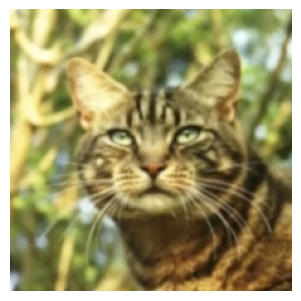

In [32]:
img_np = input_img.squeeze(0).permute(1, 2, 0).cpu().numpy()
img_np = img_np * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]  # Unnormalize
img_np = np.clip(img_np, 0, 1)
original_img = img_np
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(original_img)
# plt.title("Original Image")
plt.axis('off')

### Grad-CAM Implementation
Grad-CAM helps us visualize the regions in the image that influenced the model's prediction. Here we set up Grad-CAM to compute the gradients from the last convolutional layer of the model.

In [33]:
model = models.resnet18(weights='IMAGENET1K_V1')
model = model.eval()

### Visualization of Grad-CAM Heatmap
Finally, we visualize the Grad-CAM heatmap overlayed on the original image, highlighting the most influential areas in the image for the model's prediction.

In [34]:
import torch.nn.functional as F

# Run inference
output = model(input_img)
output = F.softmax(output, dim=1)

# Get top prediction
prediction_score, pred_label_idx = torch.topk(output, 1)
pred_label_idx = pred_label_idx.item()
prediction_score = prediction_score.item()

# Use the labels list
predicted_label = labels[pred_label_idx]
print('Predicted:', predicted_label, '(', prediction_score, ')')


Predicted: tabby ( 0.7334997653961182 )
